Př. 25: Délka výrobku v mm má N(μ=50 mm; σ^2 =0,49 mm^2 ). Určete pravděpodobnost, že rozměr výrobku bude mezi 49 a 51 mm. 
[0.8469]


In [1]:
import numpy as np
import scipy.stats as stats

# matlab implementation:
# mu = 50
# sigma = sqrt(0.49)
# p = normcdf(51, mu, sigma) - normcdf(49, mu, sigma)


mu = 50
sigma = np.sqrt(0.49)

p = stats.norm.cdf(51, mu, sigma) - stats.norm.cdf(49, mu, sigma)

p

0.8468725489803304

Př. 26: Výsledky měření jsou zatíženy jen normálně rozdělenou náhodnou chybou se směrodatnou odchylkou 3 mm. 
a)	Jaká je pravděpodobnost, že při měření bude chyba v intervalu (-2 mm, 5 mm).
b)	Máte 3 výrobky, jaká je pravděpodobnost, že alespoň u jednoho výrobku bude chyba mimo tento interval. 
[0.6997, 0.6574]


In [20]:

# matlab implementation:
# sigma = 3
# p = normcdf(5, 0, sigma) - normcdf(-2, 0, sigma)
# p2 = 1 - (1 - p)^3
    
sigma = 3
mu = 0

p = stats.norm.cdf(5, mu, sigma) - stats.norm.cdf(-2, mu, sigma)

p2_2 = 1 - p**3
 

p2 = stats.binom.cdf(2, 3, p)

# in matlab:
# p1 = normcdf(5, 0, sigma) - normcdf(-2, 0, sigma)
# p2 = binocdf(2, 3, p)


# it is at least all at once


p, p2, p2_2


(0.6997171101802624,
 0.6574156800016877,
 0.6574156800016877,
 0.21635653715957198,
 0.02707645229795298)

Př. 27: Výsledky radarového měření jsou zatíženy normálně rozdělenou náhodnou chybou s nulovou střední hodnotou, která s pravděpodobností 0.95 nepřesahuje ± 20 m. Určete směrodatnou odchylku měření.
[10.2043 m]


In [15]:
# takhle by to resil matematik:
# norminv(0.975, 0, 1) = 1.96
# x = 20

#(x - mu) / sigma = 1.96
# sigma = x / 1.96
# sigma = 20 / 1.96 = 10.2041


# matlab implementation:

# p = 0.95
# x = 20

# sigma = x / norminv((1 + p) / 2, 0, 1)


p = 0.95
x = 20

sigma = x / stats.norm.ppf((1 + p) / 2, 0, 1)

sigma

10.204269138493078

In [25]:
# programatorske reseni:

# matlab:
# sigma = 0.01:0.1:100;


# sigma

sigma = 0.01
while (stats.norm.cdf(20, 0, sigma)) - stats.norm.cdf(-20, 0, sigma) > 0.95:
    sigma += 0.1
    
sigma

10.209999999999981

In [ ]:
# izenyrsky  pristup:

# 95 % je to -2 do 2
# -> sigma je 10
# podle nejakho vzorce, znalosti o  normalnim rozdeleni


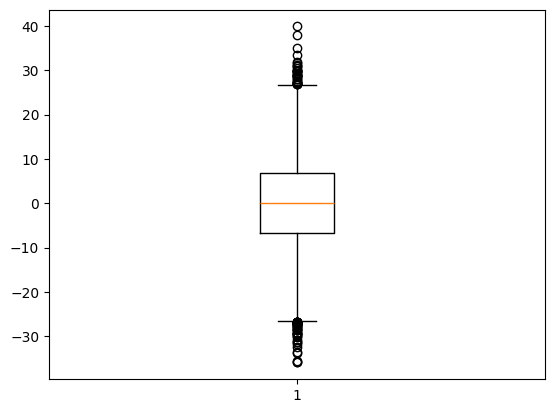

In [28]:
# box graph

import matplotlib.pyplot as plt

data = np.random.normal(0, 10, 10000)

# ifno:
# dolni a horni quartily jsou zobrazeny jako ty cary
# cervena cara je median
# okrajove hodnoty = maximum a minimum
# pluska jsou outliery (v tomto pripade kolecka)

plt.boxplot(data)
plt.show()

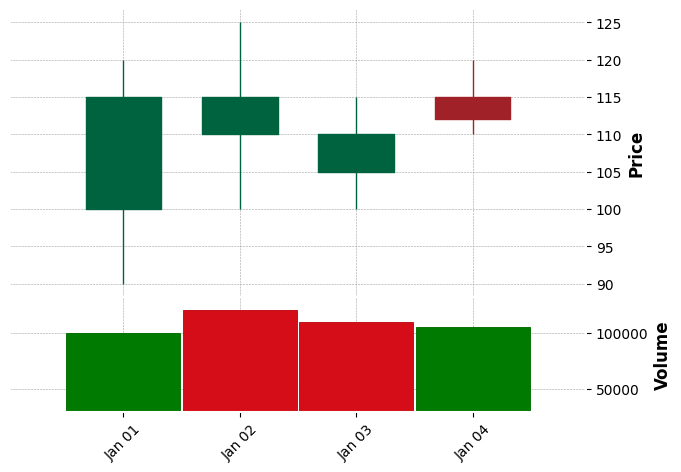

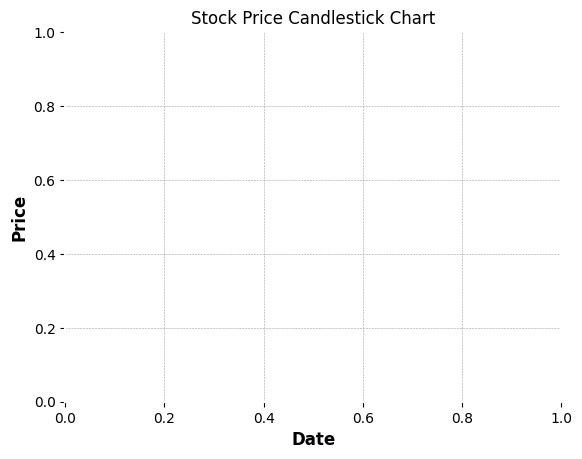

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Sample data (replace this with your stock data)
data = {
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'],
    'Open': [100, 110, 105, 115],
    'High': [120, 125, 115, 120],
    'Low': [90, 100, 100, 110],
    'Close': [115, 115, 110, 112],
    'Volume': [100000, 120000, 110000, 105000]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot candlestick graph
mpf.plot(df, type='candle', style='charles', volume=True)

plt.title('Stock Price Candlestick Chart')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()
